In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report

In [3]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv("SMSSpamCollection", sep='\t', header=None, names=['label', 'message'])
print(df.head())

Saving SMSSpamCollection to SMSSpamCollection
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [4]:
le = LabelEncoder()
df['label_num'] = le.fit_transform(df['label'])

In [6]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['message'])
y = df['label_num']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

In [9]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [10]:
def evaluate(y_true, y_pred, model_name):
    print(f"\n--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

evaluate(y_test, y_pred_lr, "Logistic Regression")
evaluate(y_test, y_pred_rf, "Random Forest")


--- Logistic Regression ---
Accuracy: 0.9883408071748879
Precision: 1.0
Recall: 0.912751677852349
F1 Score: 0.9543859649122807
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       1.00      0.91      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115


--- Random Forest ---
Accuracy: 0.97847533632287
Precision: 1.0
Recall: 0.8389261744966443
F1 Score: 0.9124087591240876
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



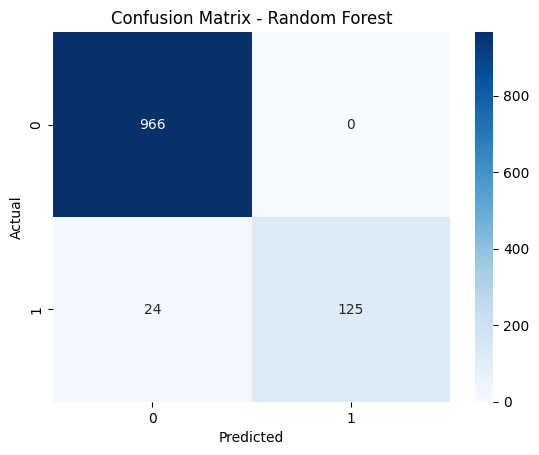

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

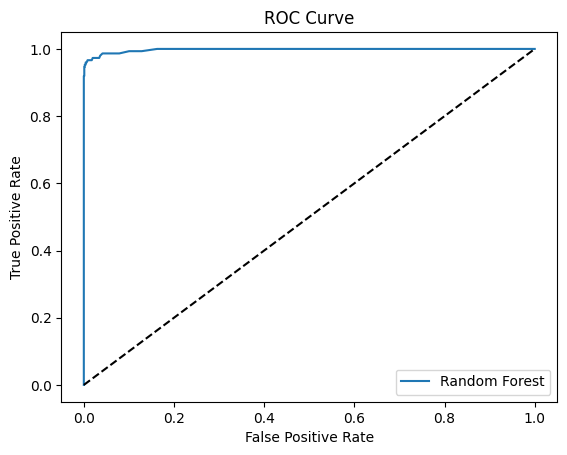

In [12]:
y_prob_rf = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [13]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20]
}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid.fit(X_train, y_train)
print("Best Params from GridSearchCV:", grid.best_params_)

Best Params from GridSearchCV: {'max_depth': None, 'n_estimators': 50}


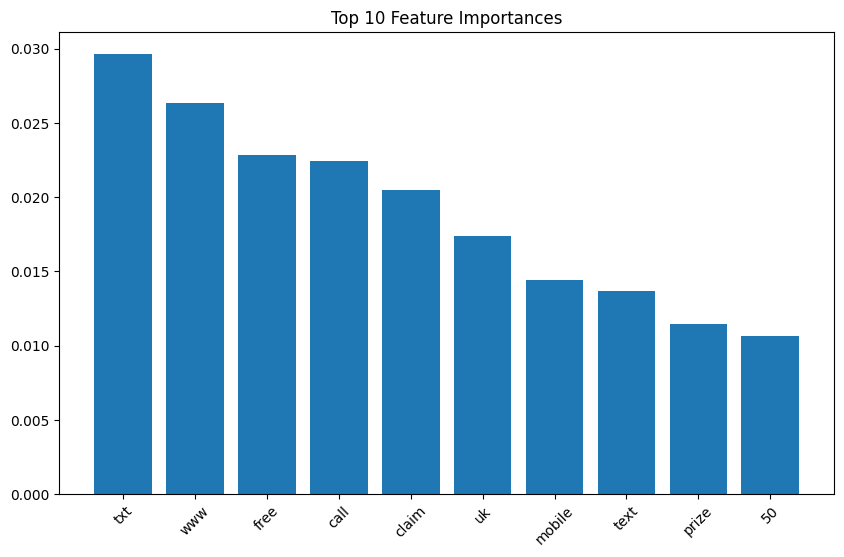

In [14]:
importances = grid.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = [vectorizer.get_feature_names_out()[i] for i in indices[:10]]
plt.figure(figsize=(10,6))
plt.title("Top 10 Feature Importances")
plt.bar(range(10), importances[indices[:10]])
plt.xticks(range(10), top_features, rotation=45)
plt.show()